In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [33]:
from cvxpy import Minimize, norm1, Variable, norm, Problem, SCS

In [5]:
%matplotlib inline

$$min_{\tilde{\beta} \in \mathbb{R}^p} \vert \vert \tilde{\beta} \vert \vert_{l_1}$$

subject to 

$$ \vert \vert X^T r \vert \vert _{l\infty}  \leq (1+t^{-1}) \sqrt{2 \log p} \cdot \sigma$$

In [ ]:
X = M
y = 

In [222]:
def solve_experiment(X, y, noise_s, t):
    n, p = X.shape
    beta = Variable(p)
    obj = Minimize(norm1(beta))
    constraints = [norm(X.T * (y - X * beta), 'inf') <= (1 + 1/t) * np.sqrt(2 * np.log(p)) * noise_s]
    prob = Problem(obj, constraints)
    prob.solve(solver=SCS)
    return np.array(beta.value).reshape(-1)

In [273]:
def create_experiment(n, p, X_s, beta_s, noise_s, S):
    X = np.random.normal(0, X_s, n * p).reshape((n, p))
    # renormalize the columns of X
    X = X / np.sqrt((X**2).sum(axis=0))

    # the real beta
    beta_true = np.zeros(p)
    random_indices = np.random.choice(range(p), replace=False, size=S)
    beta_true[random_indices] = np.random.normal(0, 1, S)

    noise = np.random.normal(0, 0.1, n)

    y = X.dot(beta_true) + noise
    return X, y, beta_true

## two stage solving

In [360]:
def two_stage_solve(X, beta, noise_s, alpha=1e-1):
    indices = np.abs(beta) > alpha * noise_s
    X_i = X[:, indices]
    beta_i = np.linalg.solve(X_i.T.dot(X_i), X_i.T.dot(y))
    beta = np.zeros(X.shape[1])
    beta[indices] = beta_i
    return beta

In [350]:
def plot_exp(beta_true, beta, beta_two=None):
    if beta_two is not None:
        plt.plot(range(p), beta_true, "o", range(p), beta, "+", range(p), beta_two, '+')
    else:
        plt.plot(range(p), beta_true, "o", range(p), beta, "+")

In [169]:
X.shape

(20, 100)

In [170]:
y.shape

(20,)

In [355]:
n = 72
p = 256
X_s = 1
beta_s = 1
S = 8
t = 1e-1
noise_s = 0.33 * np.sqrt(S / n)
alpha = 1e-1
noise_s

0.11

In [369]:
X, y, beta_true = create_experiment(n, p, X_s, beta_s, noise_s, S)

In [370]:
beta = solve_experiment(X, y, noise_s, t=5)

In [371]:
beta_two = two_stage_solve(X, beta, noise_s)

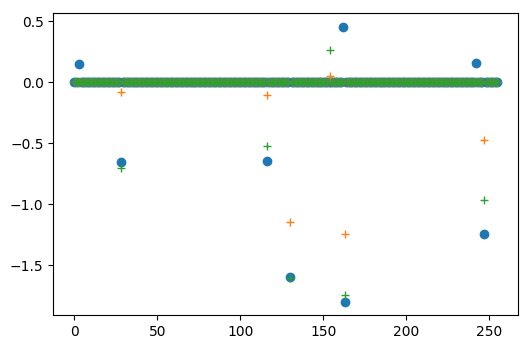

In [372]:
plot_exp(beta_true, beta, beta_two)

In [ ]:
# X is fixed
# select a support set T of size |T | = S uniformly at random, and sample a vector β on
# T with independent and identically distributed entries accor
# βi = εi(1 + |ai|) where the sign εi = ±1 with probability 1/2, and ai ∼ N(0,1)
# y ̃ = Xβ + z, with z ∼ N(0,σ2 In) and compute βˆ by means of the two-stage procedure
# repeat 500 times for each S